# Obligatorio 4 - Algoritmos

Nombre del estudiante: Patricio Carrau

Debajo de cada pregunta o tarea incluya las celdas necesarias para desarrolar la respuesta. Puede usar una o varias celdas de código o mark down (https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook)

Para entregar, renombrar este notebook como "Obligatorio 4 - Apellido Nombre" 


## Ejercicio 1
Usted es el piloto de un avión que tiene que despegar desde el punto (0,0) y aterrizar al punto (D, 0). La altura máxima a la que se puede ir es H, y el avión no puede aterrizar y volver a despegar en el medio del trayecto. Para cada distancia y altura (asumimos las mismas son discretas), tenemos un mapa de viento

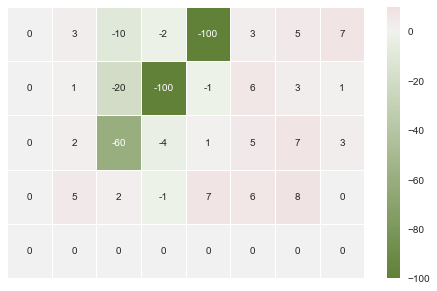

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")

w = [[0, 3, -10, -2, -100, 3, 5, 7],
     [0, 1, -20, -100, -1, 6, 3, 1],
     [0, 2, -60, -4, 1, 5, 7, 3],
     [0, 5, 2, -1, 7, 6, 8, 0],
     [0, 0, 0, 0, 0, 0, 0, 0]]

data = np.matrix(w)

plt.figure(figsize=(8,5))
cmap = sns.diverging_palette(110, 10, l=50, center="light", as_cmap=True)
sns.color_palette(['green', 'red'])
heat_map = sns.heatmap( data, cmap=cmap, center=0.00, vmin=-100.00, vmax=10.00, linewidth = 1 , annot = True, fmt='g')
plt.axis('off')
plt.show()

En cada coordenada usted debe decidir si mantenerse en la misma altura (gastando 30 unidades de combustible), bajar de altura (gastando 20 unidades de combustible), o subir de altura (gastando 60 unidades de combustible). En cada coordenada además de las unidades de combustible debido a mantener, subir o bajar de altura uno tiene que sumar la cantidad de combustible indicada en el mapa. Los valores negativos corresponden a viento a favor lo que permite gastar menos combustible. Los valores positivos indican viento en contra e implican un gasto mayor de combustible en ese punto. Implementar un algoritmo eficiente que minimice el gasto en combustible del trayecto e imprima qué acción tomar en cada distancia, para un mapa de viento dado. Analizar el orden en tiempo de ejecución  y uso de memoria de su algoritmo.
     
     

In [ ]:
w = [[0, 3, -10, -2, -100, 3, 5, 7],
     [0, 1, -20, -100, -1, 6, 3, 1],
     [0, 2, -60, -4, 1, 5, 7, 3],
     [0, 5, 2, -1, 7, 6, 8, 0],
     [0, 0, 0, 0, 0, 0, 0, 0]]

def min_combustible(w):
    return ([],[])

costos, acciones = min_combustible(w)

def mejor_ruta(acciones):
    return []


assert(['mover a 1,1', 'mover a 2,2', 'mover a 3,3', 
        'mover a 4,4', 'mover a 5,3', 'mover a 6,2',
        'mover a 7,1'] == mejor_ruta(acciones))




## Ejercicio 2

El profesor Curly está planeando un viaje por carretera a través del país desde Boston a Seattle por la Interestatal 90, y necesita alquilar un automóvil. Su primera inclinación fue llamar a las distintas agencias de alquiler de autos para encontrar el mejor precio para alquilar un vehículo de Boston a Seattle, pero ha aprendido, para su consternación, que esta puede no ser una estrategia óptima. Debido a la gran cantidad de agencias de alquiler de automóviles y las diversas guerras de precios entre ellas, en realidad podría ser más barato alquilar un automóvil de Boston a Cleveland con Hertz, seguido de un segundo automóvil de Cleveland a Chicago con Avis, etc. que alquilar cualquier auto desde Boston a Seattle.

El profesor Curly no se opone a detenerse en una ciudad importante a lo largo de la Interestatal 90 para cambiar los autos de alquiler; sin embargo, no desea dar marcha atrás debido a limitaciones de tiempo. (En otras palabras, un viaje de Boston a Chicago, de Chicago a Cleveland y de Cleveland a Seattle está fuera de discusión). El profesor Curly ha seleccionado n ciudades importantes a lo largo de la Interestatal 90 y las ha ordenado de este a oeste, donde se encuentra la ciudad 1 Boston y la ciudad n son Seattle. Ha construido una tabla $costo[i, j]$ que para todo $i<j$ contiene el costo del automóvil de alquiler individual más barato de la ciudad i a la ciudad j. El profesor Curly quiere viajar lo más barato posible. Diseñe un algoritmo que resuelva este problema, argumente que su algoritmo es correcto y analice sus requisitos de tiempo y espacio de ejecución. Su algoritmo o algoritmos deben generar tanto el costo total del viaje como las distintas ciudades en las que se deben dejar y / o recoger los autos de alquiler.

##### Cambie el orden de las cuidades en la tabla porque esta mal

In [9]:
import numpy as np
#            boston   cleveland  chicago   seattle
# boston       0        10        30         180
# chicago      -         0        25         130
# cleveland    -        -          0         70
# seattle      -        -          -          0


def mejor_ruta(costos, origen, destino):
    mejores_costos = [[0 for i in range(len(costos[0]))] for j in range(len(costos))]
    menos_costo = []
    for columna in range(origen + 1, destino + 1):
        for fila in range(columna):
            if fila == 0:
                menos_costo = [costos[fila][columna], [0, columna]]
            else:
                nuevo_costo = costos[fila][columna] + mejores_costos[fila - 1][columna - 1][0]
                if nuevo_costo < menos_costo[0]:
                    temp_ciudades = mejores_costos[fila - 1][columna - 1][1].copy()
                    temp_ciudades.append(columna)
                    menos_costo = [nuevo_costo, temp_ciudades]
            mejores_costos[fila][columna] = menos_costo
    return menos_costo[0], menos_costo[1]


costos = [[0, 10, 30, 180],
          [np.inf, 0, 25, 130],
          [np.inf, np.inf, 0, 70],
          [np.inf, np.inf, np.inf, 0]]

assert mejor_ruta(costos, 0, 3) == (100, [0, 2, 3])
# mejor_ruta(costos, 0, 3)

## Ejercicio 3
Dada una secuencia de números enteros, escribir un algoritmo que devuelva la sub secuencia más larga de números crecientes. Ejemplo: Si la secuencia es $1,20,3,7,40,5,2$, la respuesta es $1,3,7,40$.  

1. Implementar una versión recursiva del algoritmo
2. Implementar una versión recursiva del algoritmo usando un cache (en una celda distinta usando la firma abajo)
3. Implementar una versión iterativa del algoritmo con principios de programación dinámica (en una celda distinta usando la firma abajo). 
4. Dar una cota asintótica superior en función de el tamaño de la secuencia de entrada. 


#### 1 Recursivo

In [9]:
def lcs(a,b):
    if len(a) == 0:
        return []
    elif len(b) == 0:
        return []
    elif a[0] == b[0]:
        sub_lcs = lcs(a[1:],b[1:])
        return [a[0]] + sub_lcs
    else:
        a_lcs = lcs(a,b[1:])
        b_lcs = lcs(a[1:],b)
        if len(a_lcs)>len(b_lcs):
            return a_lcs
        else:
            return b_lcs

array = [1, 20, 3, 7, 40, 5, 2]

def lgs(l):
    l_sorted = l.copy()
    l_sorted.sort()
    return lcs(l,l_sorted)

print(lgs(array))
assert(lgs([1, 20, 3, 7, 40, 5, 2]) == [1,3,7,40])

[1, 3, 7, 40]


#### 2 Recursivo con cache

In [17]:
def hash_array(s):
    new = ''
    for x in s:
          new += str(x)
    return new

cache = {}
def lcs(a,b):
    if (hash_array(a),hash_array(b)) in cache:
        return cache[(hash_array(a),hash_array(b))]
    if len(a) == 0:
        ret = []
    elif len(b) == 0:
        ret =  []
    elif a[0] == b[0]:
        sub_lcs = lcs(a[1:],b[1:])
        ret =  [a[0]] + sub_lcs
    else:
        a_lcs = lcs(a,b[1:])
        b_lcs = lcs(a[1:],b)
        if len(a_lcs)>len(b_lcs):
            ret = a_lcs
        else:
            ret = b_lcs
    cache[(hash_array(a),hash_array(b))] = ret
    return ret

array = [1, 20, 3, 7, 40, 5, 2]

def lgs(l):
    l_sorted = l.copy()
    l_sorted.sort()
    return lcs(l,l_sorted)

print(lgs(array))

assert(lgs([1, 20, 3, 7, 40, 5, 2]) == [1,3,7,40])

[1, 3, 7, 40]


#### 3 iterativo programación dinamica

In [ ]:
def lgs(l):
    return []

assert(lgs([1, 20, 3, 7, 40, 5, 2]) == [1,3,7,40])

## Ejercicio 4
Carlitos está visitando la fábrica de chocolates de Willy Wonka. Al final de la visita, le dan una caja en el cual podrá colocar hasta N kilogramos de tabletas de chocolates.  Carlitos durante su visita probó todas las distintas variedades de chocolates y les asignó una calificación a cada una de ellas (donde una calificación más alta corresponde a un chocolate más gustoso).

La fábrica cuenta con un stock ilimitado de tabletas. El objetivo de Carlitos es de llevarse chocolates de tal forma de maximizar la calificación total (es decir, las suma de los productos entre la calificación y la cantidad). Las tabletas no se pueden dividir.


Suponga que N=15 kg y la fábrica cuenta con el siguiente stock de tabletas: 

| Tableta | Peso de una tableta (kg) | Calificación |
| ---     | ---                      | ---          |
|TabletaPlus | 12 | 4 
|     ChockRick | 1 | 2 |
|     DulceChoc | 2 | 2 |
|     DeliChoc | 1 | 1 |
|     YumTableta | 4 | 10 |

1. Indique cuantas y cuales tabletas  deberá cargar Carlitos en su caja. 
2. Escriba un algoritmo que devuelva cuales y cuantas tabletas debe elegir Carlitos, dada una tabla como en la parte 1, pero con pesos y calificaciones arbitrarias. Argumentar la correctitud del algoritmo de acuerdo a los estándares usuales del curso.
3.Para su algoritmo dar la cota asintótica en términos de tiempo y espacio en memoria.



In [ ]:
def seleccionar(W, wt, val):
    return 0

W = 15
wt = [12, 1, 2, 1, 4]
val = [4, 2, 2, 1, 10]
assert(seleccionar(W, wt, val) == (36,[0,3,0,3]))